<a href="https://colab.research.google.com/github/devpatat/ML_Projects/blob/master/Decision_Boundry_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import pandas as pd
data= pd.read_csv("imp_feat.csv")

In [ ]:
data["result"]=[1 if x =='M' else 0 for x in data['diagnosis']]
data

,diagnosis,radius_mean,texture_mean,smoothness_mean,symmetry_mean,area_se,texture_worst,area_worst,smoothness_worst,concave points_worst,result
0,M,17.99,10.38,0.11840,0.2419,153.40,17.33,2019.0,0.16220,0.2654,1
1,M,20.57,17.77,0.08474,0.1812,74.08,23.41,1956.0,0.12380,0.1860,1
2,M,19.69,21.25,0.10960,0.2069,94.03,25.53,1709.0,0.14440,0.2430,1
3,M,11.42,20.38,0.14250,0.2597,27.23,26.50,567.7,0.20980,0.2575,1
4,M,20.29,14.34,0.10030,0.1809,94.44,16.67,1575.0,0.13740,0.1625,1
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.1726,158.70,26.40,2027.0,0.14100,0.2216,1
565,M,20.13,28.25,0.09780,0.1752,99.04,38.25,1731.0,0.11660,0.1628,1
566,M,16.60,28.08,0.08455,0.1590,48.55,34.12,1124.0,0.11390,0.1418,1
567,M,20.60,29.33,0.11780,0.2397,86.22,39.42,1821.0,0.16500,0.2650,1


In [ ]:
df = data[["radius_mean","texture_mean"]]
X=df[0::5].to_numpy()
y = data["result"][0::5].values
colormap = np.array(['r', 'b'])

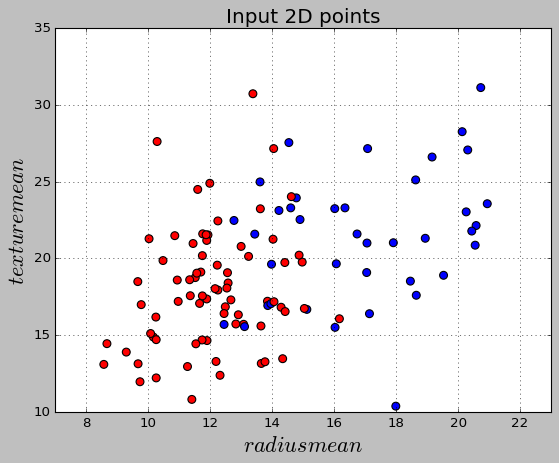

In [ ]:
def plot_scatter(X, y, colormap, path):
  plt.grid()
  plt.xlim([7, 23.0])
  plt.ylim([10, 35])
  plt.xlabel('$radiusmean$', size=20)
  plt.ylabel('$texturemean$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])
  plt.savefig(path)
plot_scatter(X,y,colormap,'data.png')

In [ ]:
import math
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = 1 / (1 + math.exp(-float(np.matmul(theta, X[i]))))
    h = h.reshape(X.shape[0])
    return h

def BGD(theta, alpha, num_iters, h, X, y, n):
    theta_history = np.ones((num_iters,n+1))
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j]=theta[j]-(alpha/X.shape[0])*sum((h-y)
                               *X.transpose()[j])
        theta_history[i] = theta
        h = hypothesis(theta, X, n)
        cost[i]=(-1/X.shape[0])*sum(y*np.log(h)+(1-y)*np.log(1 - h))
    theta = theta.reshape(1,n+1)
    return theta, theta_history, cost
def logistic_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta,theta_history,cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, theta_history, cost

In [ ]:
theta,theta_history,cost=logistic_regression(X,y,.008,10000)

In [ ]:
theta_history[0]

array([-0.012, -0.074, -0.166])

In [ ]:
sigmoid = lambda x: 1/(1+np.exp(-x))

Text(0, 0.5, 'Cost')

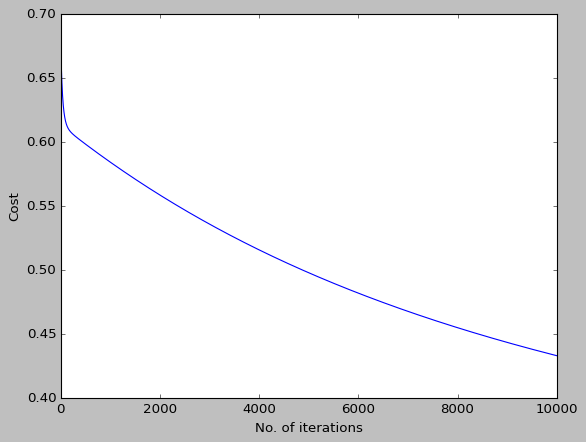

In [ ]:
cost = list(cost)
n_iterations = [x for x in range(1,10001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

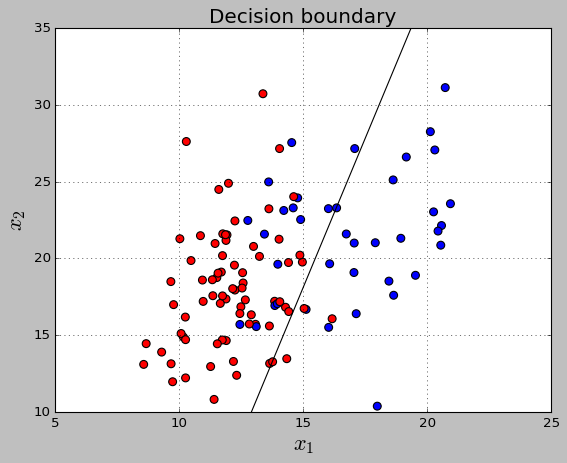

In [ ]:
def plot_decision_boundary(X, y):
   plt.grid()
   plt.xlim([5.0, 25.0])
   plt.ylim([10.0, 35.0])
   plt.xlabel('$x_1$', size=20)
   plt.ylabel('$x_2$', size=20)
   plt.title('Decision boundary', size = 18)

   xs = np.array([min(X[:,0]) - 2, max(X[:,0]) + 2])
   ys = (-1/theta[0][2]) * (theta[0][1] *xs + theta[0][0])

   plt.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
   plt.plot(xs, ys, c='black')


plot_decision_boundary(X, y)


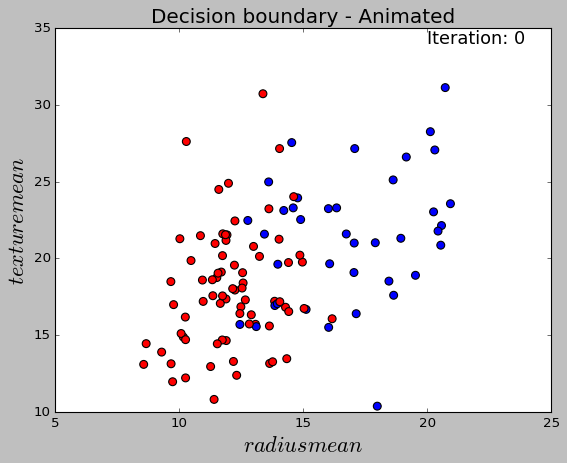

In [ ]:
import matplotlib.animation as animation

fig = plt.figure()

ax = fig.add_subplot(111)
plt.xlim([5.0, 25.0])
plt.ylim([10.0, 35.0])
plt.xlabel('$radiusmean$', size=20)
plt.ylabel('$texturemean$', size=20)

ax.set_title('Decision boundary - Animated', size = 18)

def animate(i):
  xs = np.array([min(X[:,0]) - 2, max(X[:,0]) + 2])
  ys = (-1/theta_history[i][2]) * (theta_history[i][1] *xs + theta_history[i][0])
  lines.set_data(xs, ys)
  text_box.set_text('Iteration: {}'.format(i))

  return lines, text_box

lines, = ax.plot([], [], c='black')
ax.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
text_box = ax.text(20, 34, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate,frames=10000)
anim.save('animation.mp4',fps=400)

In [ ]:
  ys = (-1/theta_history[i][2]) * (theta_history[i][1] *xs + theta_history[i][0])

In [ ]:
w[1]= theta[2]
w[0] = theta[1]
b = theta[0]

array([-3.74 ,  0.362, -0.093])

In [ ]:
theta[0][0]

-3.7403015158620696